In [1]:
import os

import numpy as np
import importlib
import gymnasium as gym
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.animation as manimation

import gym_env
import utils
from models import LinearRL_NHB, SR_NHB
from utils_render import plot_decision_prob
from utils import policy_reval, decision_policy, replan_barrier

In [2]:
# Set the random seed for NumPy
seed = 42
np.random.seed(42)

# Save dir
save_dir = os.path.join('..', 'figures/')

In [3]:
# For plotting
prob_locs = [1, 2]
colors = [3, 2]

# Policy Revaluation

### Construct Average DR

In [56]:
num_iterations = 200

DR_avg_with_imp = np.zeros((9, 9))
DR_avg_no_imp = np.zeros((9,9))
# SR_avg = np.zeros((9,9))

for i in range(num_iterations):
    # Define agents
    agent_with_imp = LinearRL_NHB(_lambda=10, alpha=0.25, beta=0.2, num_steps=100, policy="softmax", imp_samp=True, exp_type="policy_reval")
    agent_no_imp = LinearRL_NHB(_lambda=10, alpha=0.25, beta=0.2, num_steps=100, policy="softmax", imp_samp=False, exp_type="policy_reval")
    # agent_SR = SR_NHB(alpha=0.25, beta=10, num_steps=250, policy="softmax")

    # Have the agents learn the environment
    agent_with_imp.learn()
    agent_no_imp.learn()
    # agent_SR.learn()

    # Add to the averages
    DR_avg_with_imp += agent_with_imp.DR
    DR_avg_no_imp += agent_no_imp.DR
    # SR_avg += agent_SR.SR

# Take average
DR_avg_with_imp /= num_iterations
DR_avg_no_imp /= num_iterations
# SR_avg /= num_iterations

## With Importance Sampling

In [57]:
# Original training policy
agent_with_imp.DR = DR_avg_with_imp
agent_with_imp.update_Z()
agent_with_imp.update_V()
pii_old = decision_policy(agent_with_imp, agent_with_imp.Z)

# Policy revaluation
agent_with_imp.update_exp()
V_new, Z_new = policy_reval(agent_with_imp)
pii_new = decision_policy(agent_with_imp, Z_new)

In [58]:
print(pii_old[0])
print(pii_new[0])

[0.         0.21443387 0.78556613 0.         0.         0.
 0.         0.         0.        ]
[0.         0.57184931 0.42815069 0.         0.         0.
 0.         0.         0.        ]


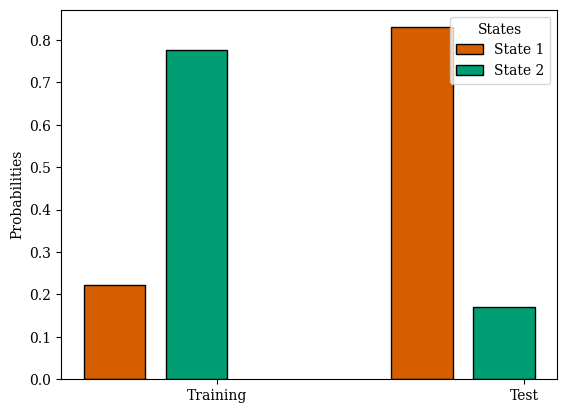

In [70]:
save_path = save_dir + 'policy_reval_nhb_with_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None, title=None)

## Without Importance Sampling

In [60]:
# Original training policy
agent_no_imp.DR = DR_avg_no_imp
agent_no_imp.update_Z()
agent_no_imp.update_V()
pii_old = decision_policy(agent_no_imp, agent_no_imp.Z)

# Policy revaluation
agent_no_imp.update_exp()
V_new, Z_new = policy_reval(agent_no_imp)
pii_new = decision_policy(agent_no_imp, Z_new)

In [61]:
print(pii_old[0])
print(pii_new[0])

[0.         0.16020168 0.83979832 0.         0.         0.
 0.         0.         0.        ]
[0.         0.20660419 0.79339581 0.         0.         0.
 0.         0.         0.        ]


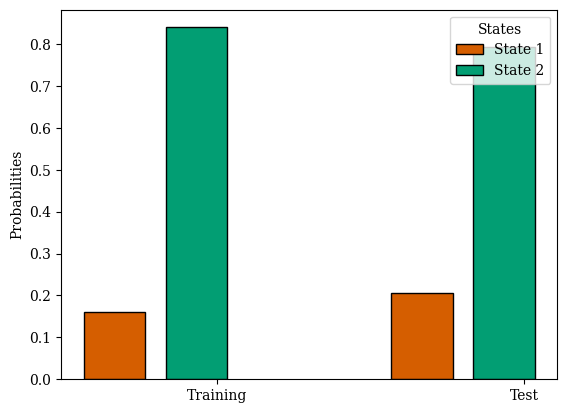

In [62]:
save_path = save_dir + 'policy_reval_nhb_without_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None)

# Reward Revaluation

### Construct Average DR

In [63]:
num_iterations = 200

DR_avg_with_imp = np.zeros((9, 9))
DR_avg_no_imp = np.zeros((9,9))
# SR_avg = np.zeros((9,9))

for i in range(num_iterations):
    # Define agents
    agent_with_imp = LinearRL_NHB(_lambda=10, alpha=0.25, beta=0.2, num_steps=100, policy="softmax", imp_samp=True, exp_type="reward_reval")
    agent_no_imp = LinearRL_NHB(_lambda=10, alpha=0.25, beta=0.2, num_steps=100, policy="softmax", imp_samp=False, exp_type="reward_reval")
    # agent_SR = SR_NHB(alpha=0.25, beta=10, num_steps=250, policy="softmax", exp_type="reward_reval")

    # Have the agents learn the environment
    agent_with_imp.learn()
    agent_no_imp.learn()
    # agent_SR.learn()

    # Add to the averages
    DR_avg_with_imp += agent_with_imp.DR
    DR_avg_no_imp += agent_no_imp.DR
    # SR_avg += agent_SR.SR

# Take average
DR_avg_with_imp /= num_iterations
DR_avg_no_imp /= num_iterations
# SR_avg /= num_iterations

## With Importance Sampling

In [64]:
# Original training policy
agent_with_imp.DR = DR_avg_with_imp
agent_with_imp.update_Z()
agent_with_imp.update_V()
pii_old = decision_policy(agent_with_imp, agent_with_imp.Z)

# Reward revaluation
agent_with_imp.update_exp()
V_new, Z_new = policy_reval(agent_with_imp)
pii_new = decision_policy(agent_with_imp, Z_new)

In [65]:
print(pii_old[0])
print(pii_new[0])

[0.         0.20460407 0.79539593 0.         0.         0.
 0.         0.         0.        ]
[0.         0.78357496 0.21642504 0.         0.         0.
 0.         0.         0.        ]


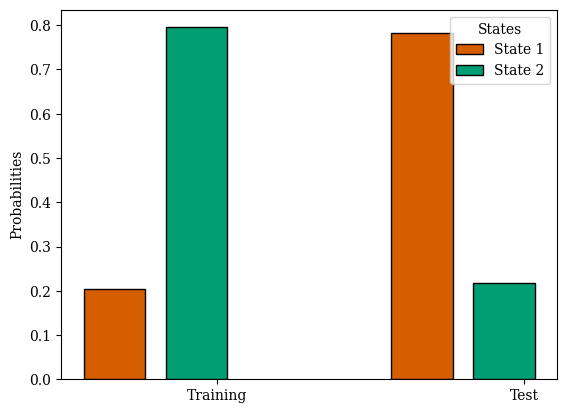

In [66]:
save_path = save_dir + 'reward_reval_nhb_with_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None)

## Without Importance Sampling

In [67]:
# Original training policy
agent_no_imp.DR = DR_avg_no_imp
agent_no_imp.update_Z()
agent_no_imp.update_V()
pii_old = decision_policy(agent_no_imp, agent_no_imp.Z)

# Reward revaluation
agent_no_imp.update_exp()
V_new, Z_new = policy_reval(agent_no_imp)
pii_new = decision_policy(agent_no_imp, Z_new)

In [68]:
print(pii_old[0])
print(pii_new[0])

[0.         0.22282508 0.77717492 0.         0.         0.
 0.         0.         0.        ]
[0.         0.82993837 0.17006163 0.         0.         0.
 0.         0.         0.        ]


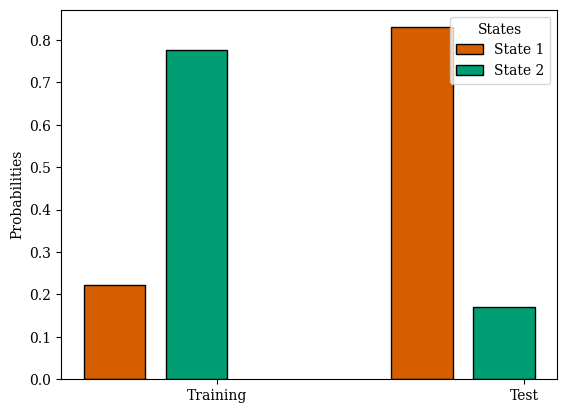

In [69]:
save_path = save_dir + 'reward_reval_nhb_without_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None)

# Transition Revaluation

### Construct Average DR

In [26]:
num_iterations = 500

DR_avg_with_imp = np.zeros((9, 9))
DR_avg_no_imp = np.zeros((9,9))
# SR_avg = np.zeros((9,9))

for i in range(num_iterations):
    # Define agents
    agent_with_imp = LinearRL_NHB(_lambda=10, alpha=0.25, beta=1, num_steps=250, policy="softmax", imp_samp=True, exp_type="trans_reval")
    agent_no_imp = LinearRL_NHB(_lambda=10, alpha=0.25, beta=1, num_steps=250, policy="softmax", imp_samp=False, exp_type="trans_reval")
    # agent_SR = SR_NHB(alpha=0.25, beta=10, num_steps=250, policy="softmax", exp_type="reward_reval")

    # Have the agents learn the environment
    agent_with_imp.learn()
    agent_no_imp.learn()
    # agent_SR.learn()

    # Add to the averages
    DR_avg_with_imp += agent_with_imp.DR
    DR_avg_no_imp += agent_no_imp.DR
    # SR_avg += agent_SR.SR

# Take average
DR_avg_with_imp /= num_iterations
DR_avg_no_imp /= num_iterations
# SR_avg /= num_iterations

In [27]:
delta_locs = [1,2]

## With Importance Sampling

In [28]:
# Original training task
agent_with_imp.DR = DR_avg_with_imp
agent_with_imp.update_Z()
agent_with_imp.update_V()
pii_old = decision_policy(agent_with_imp, agent_with_imp.Z)

# Transition revaluation
T_new = agent_with_imp.construct_T_new()
D_new = replan_barrier(agent=agent_with_imp, T_new=T_new, delta_locs=delta_locs)
agent_with_imp.DR = D_new
agent_with_imp.update_Z()
agent_with_imp.update_V()
pii_new = decision_policy(agent_with_imp, agent_with_imp.Z)

In [29]:
print(pii_old[0])
print(pii_new[0])

[0.         0.20016837 0.79983163 0.         0.         0.
 0.         0.         0.        ]
[0.         0.75401393 0.24598607 0.         0.         0.
 0.         0.         0.        ]


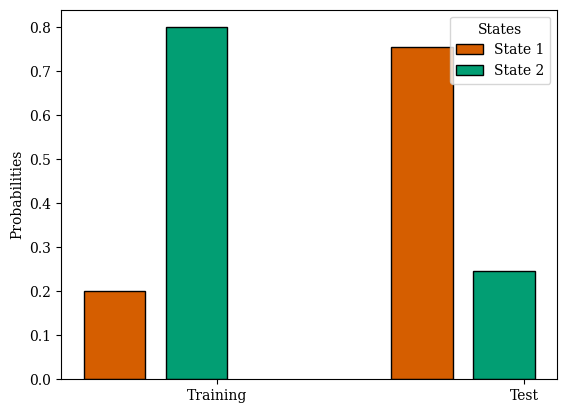

In [30]:
save_path = save_dir + 'transition_reval_nhb_with_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None, title="Transition with importance sampling")

## Without Importance Sampling

In [31]:
# Original training task
agent_no_imp.DR = DR_avg_no_imp
agent_no_imp.update_Z()
agent_no_imp.update_V()
pii_old = decision_policy(agent_no_imp, agent_no_imp.Z)

# Transition revaluation
T_new = agent_no_imp.construct_T_new()
D_new = replan_barrier(agent=agent_no_imp, T_new=T_new, delta_locs=delta_locs)
agent_no_imp.DR = D_new
agent_no_imp.update_Z()
agent_no_imp.update_V()
pii_new = decision_policy(agent_no_imp, agent_no_imp.Z)

In [32]:
print(pii_old[0])
print(pii_new[0])

[0.         0.13348926 0.86651074 0.         0.         0.
 0.         0.         0.        ]
[0.         0.48331565 0.51668435 0.         0.         0.
 0.         0.         0.        ]


In [1]:
save_path = save_dir + 'transition_reval_nhb_without_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None, title="Transition without importance sampling")

NameError: name 'save_dir' is not defined